# k-Nearest Neighbors multi-class classification

In deze opdracht voorspel je welke beslissingen er genomen worden over auto's. Er zijn vier mogelijke beslissingen:

- 'unacc': unacceptable
- 'acc', : acceptable
- 'good',: good
- 'vgood': very good

Omdat er 4 mogelijke beslissingen zijn, wordt dit een "multi-class classification" probleem genoemd. Merk hierbij op dat beslissingsopties op een "ordinale" schaal liggen. De "laagste" beslissing is "unacceptable" en de "hoogste" beslissing is "very good".

Je maakt hierbij gebruik van 6 eigenschappen (features) van de auto's om te voorspellen welke beslissing wordt genomen.
Deze 'features' staan in de eerste 6 kolommen van de dataset. De zevende kolom bevat de beslissing over de dataset.

---

In this assignment you predict which decisions will be made about cars. There are four possible decisions:

- 'unacc': unacceptable
- 'acc', : acceptable
- 'good',: good
- 'vgood': very good

Because there are 4 possible decisions, this is called a "multi-class classification" problem. Note that decision options are on an "ordinal" scale. The "lowest" decision is "unacceptable" and the "highest" decision is "very good".

You use 6 properties (features) of the cars to predict which decision will be made.
These 'features' are in the first 6 columns of the dataset. The seventh column contains the dataset decision.

## 0 Import the dataset
- Execute the cell below to import the dataset and necessary libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

df = pd.read_csv('cars.csv', header = None )
display(df.head(), df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       1728 non-null   object
 1   1       1728 non-null   object
 2   2       1728 non-null   object
 3   3       1728 non-null   object
 4   4       1728 non-null   object
 5   5       1728 non-null   object
 6   6       1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


None

## 1A Pre-processing of the dataset: requirements
- Er zijn een aantal vereisten (requirements) waaraan de data moet voldoen om er machine learning op te kunnen toepassen. Benoem, als comments, in onderstaande cel wat de vereisten zijn.
- In hoeverre voldoet de dataset aan de vereisten?

---
- There are a number of requirements that the data must meet in order to be able to apply machine learning to it. Mention, as comments, in the cell below what the requirements are.
- To what extent does the dataset meet the requirements?

In [2]:
#Requirements: 
#No missing values, Data in numeric format
#Data stored in pandas DataFrame or NumPy array

#Does not meet the requirements because not all the data is numeric

## 1B Pre-processing the dataset: understanding code
In de onderstaande cel wordt pre-processing van de data uitgevoerd. Er staan 5 hashtags in deze cel.
- Beschrijf bij iedere hashtag wat het resultaat is van de code eronder **en** waarom deze code is toegepast.

---
Pre-processing of the data is performed in the cell below. There are 5 hashtags in this cell.
- Describe for each hashtag what the result of the code underneath is **and** why this code has been applied.

In [3]:
#1: 
df.columns = ['buy_price','maint_cost','num_doors','num_persons','lug_boot','safety','decision']

#2: 
bp = list(set(df['buy_price']))
mc = list(set(df['maint_cost']))
nd = list(set(df['num_doors']))
np = list(set(df['num_persons']))
lb = list(set(df['lug_boot']))
sy = list(set(df['safety']))
dn = list(set(df['decision']))
display('bp', bp, 'mc', mc, 'nd' , nd , 'np', np, 'lb', lb, 'sy', sy, 'dn', dn)

#3: 
cars = df.copy()

#4:
cars.buy_price.replace(('low', 'med', 'high', 'vhigh'),(1,2,3,4), inplace=True)
cars.maint_cost.replace(('low', 'med', 'high', 'vhigh'),(1,2,3,4), inplace=True)
cars.num_doors.replace(('2','3','4','5more'),(1,2,3,4), inplace=True)
cars.num_persons.replace(('2','4','more'),(1,2,3), inplace=True)
cars.lug_boot.replace(('small','med','big'),(1,2,3), inplace=True)
cars.safety.replace(('low','med','high'),(1,2,3), inplace=True)
cars.decision.replace(('unacc','acc','good','vgood'),(1,2,3,4), inplace=True)

#5:
display(cars.info(), cars.describe())

'bp'

['low', 'high', 'vhigh', 'med']

'mc'

['low', 'high', 'vhigh', 'med']

'nd'

['5more', '2', '3', '4']

'np'

['2', '4', 'more']

'lb'

['small', 'big', 'med']

'sy'

['low', 'high', 'med']

'dn'

['unacc', 'good', 'vgood', 'acc']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   buy_price    1728 non-null   int64
 1   maint_cost   1728 non-null   int64
 2   num_doors    1728 non-null   int64
 3   num_persons  1728 non-null   int64
 4   lug_boot     1728 non-null   int64
 5   safety       1728 non-null   int64
 6   decision     1728 non-null   int64
dtypes: int64(7)
memory usage: 94.6 KB


None

,buy_price,maint_cost,num_doors,num_persons,lug_boot,safety,decision
count,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000
mean,2.500000,2.500000,2.500000,2.000000,2.000000,2.000000,1.414931
std,1.118358,1.118358,1.118358,0.816733,0.816733,0.816733,0.740700
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.750000,1.750000,1.750000,1.000000,1.000000,1.000000,1.000000
50%,2.500000,2.500000,2.500000,2.000000,2.000000,2.000000,1.000000
75%,3.250000,3.250000,3.250000,3.000000,3.000000,3.000000,2.000000
max,4.000000,4.000000,4.000000,3.000000,3.000000,3.000000,4.000000


### 1C Check the data frame
- Bepaal of er "missende waardes" zijn.
- Maak een visualisatie waarin je toont hoe de variabelen zijn verdeeld.
- Wat valt je op aan deze verdelingen?
- Denk je dat dat dit een echte dataset is of een kunstmatige dataset? Waarom?

---
- Determine if there are "missing values".
- Make a visualization showing how the variables are distributed.
- What do you notice about these distributions?
- Do you think this is a real dataset or an artificial dataset? Why?

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   buy_price    1728 non-null   int64
 1   maint_cost   1728 non-null   int64
 2   num_doors    1728 non-null   int64
 3   num_persons  1728 non-null   int64
 4   lug_boot     1728 non-null   int64
 5   safety       1728 non-null   int64
 6   decision     1728 non-null   int64
dtypes: int64(7)
memory usage: 94.6 KB


None

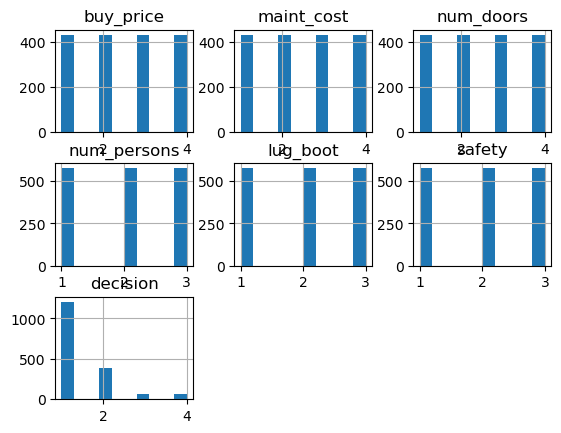

In [4]:
display(cars.info())
cars.hist()
plt.show()
# No missing values

# real/artificial? 
#Not realistic because the distributions of the features are exactly 
#equal, to good to be true.

## 2 Apply k-nearest neighbors

### 2A Naming variables
1. Het uiteindelijke doel is om de 'decision' kolom te voorspellen. We hanteren voor deze variabele een engelstalige naam. Wat is de naam van deze variabele?
2. Is dit een x-variabele of y-variabele?
3. Wiskundig wordt voor deze variabele ook een andere naam gehanteerd. Wat is de wiskundige naam van voor de "te voorspellen" variabele?
4. De andere kolommen (variabelen) worden gebruikt om de 'decision' kolom te voorspellen. Hoe noemen we deze variabelen? Zijn dit x-variabelen of y-variabelen?
5. Splits the data in x-variabelen en een y-variabele

---

1. The ultimate goal is to predict the 'decision' column. We use an English name for this variable. What is the name of this variable?
2. Is this an x variable or y variable?
3. Mathematically, this variable also has a different name. What is the mathematical name for the "predictable" variable?
4. The other columns (variables) are used to predict the 'decision' column. What do we call these variables? Are these x variables or y variables?
5. Split the data into x variables and a y variable

In [5]:
#1 variable name: target, dependent
#2 x or y variable: y
#3 math name: y-hat
#4 name of other columns: feature, predictors, indipendent , x or y variables:
#5: below code for split into X and y:
X = cars.drop('decision', axis = 1)
y = cars['decision']

### 2B Split into training data and test data.
1. Splits de data in train-sets en test-sets. Importeer daarvoor eerst de juiste module van sklearn. Zorg ervoor dat iedere keer als deze cel wordt uitgevoerd de splitsing op dezelfde wijze plaatsvindt.
2. Beschrijf waarom het nodig is om deze splitsing te maken.

---
1. Split the data into train sets and test sets. To do this, first import the correct module from sklearn. Make sure that every time this cell is run the split is done in the same way.
2. Describe why it is necessary to make this split.

In [6]:
#1
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

#Reason for split into train set and test set:
# We use the training data to train the model. 
# The test data has not yet "seen" the model and is being used
# to determine (test) if the model works properly.

X_train

,buy_price,maint_cost,num_doors,num_persons,lug_boot,safety
520,3,4,4,1,3,2
621,3,3,4,1,1,1
1017,2,3,2,3,1,1
1273,2,1,4,1,2,2
924,2,4,3,1,3,1
...,...,...,...,...,...,...
835,3,1,3,3,3,2
1216,2,1,2,1,1,2
1653,1,1,2,1,3,1
559,3,3,1,3,1,2


### 2C Training and forecasting
- Importeer de KNN classifier van sklearn.
- Train een KNN-model met een k van 3.
- Gebruik dit model om voorspellingen te doen voor de test set.
- Toon de voorspellingen

---
- Import the KNN classifier from sklearn.
- Train a KNN model with a k of 3.
- Use this model to make predictions for the test set.
- Show the predictions

In [7]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)
display(predictions)

array([2, 1, 1, 1, 1, 4, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 4, 2,
       3, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 2,
       1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 4, 1, 1, 1, 4, 1, 2, 2, 1, 1, 1, 2, 1, 4, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 2, 3, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1,
       1, 1, 1, 1, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 4, 1, 1, 1, 4, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2,
       1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

### Determine 2D accuracy
- Maak een dataframe waarin de eerste kolom de waardes uit y_test zijn en de tweede kolom de voorspellingen zijn.
- Voeg aan dit dataframe de kolom 'dif' toe. In deze kolom staat het verschil tussen de werkelijke waarde en de voorspelde waarde.
- Maak een dataframe dif waarin je laat zien hoe vaak iedere waarde in de kolom 'dif' voorkomt.
- Bepaal het aantal juiste voorspellingen en wijs dit toe aan de variabele correct.
- Bepaal het totale aantal voorspellingen en wijs dit toe aan de variabele total.
- Toon de "accuracy" van het model waarbij je gebruik maakt van correct en total.

---
- Create a dataframe in which the first column is the values from y_test and the second column is the predictions.
- Add the 'dif' column to this data frame. This column shows the difference between the actual value and the predicted value.
- Create a dataframe diff in which you show how often each value occurs in the column 'dif'.
- Determine the number of correct predictions and assign it to the variable correct.
- Determine the total number of predictions and assign it to the variable total.
- Show the "accuracy" of the model using correct and total.

In [16]:
comp = pd.DataFrame(y_test)
comp['predictions'] = predictions
comp['dif'] = comp['decision'] - comp['predictions']
dif = comp.groupby('dif')[['predictions']].count()
display(dif)
correct = dif.loc[0]
total = len(comp)
accuracy = correct / total
accuracy

,predictions
dif,
-2,1
-1,16
0,371
1,32
2,12


predictions    0.858796
Name: 0, dtype: float64

## 3 Choice of correct value of k

### 3A Accuracy training set and test set
- Gebruik de score-method van sklearn om de accuracy van de trainingsdata en de testdata te berekenen bij k=3.
- Waarom is het van belang om voor zowel de testdata als de trainingsdata de accuracy score te berekenen?

---
- Use the sklearn scoring method to calculate the accuracy of the training data and the test data at k=3.
- Why is it important to calculate the accuracy score for both the test data and the training data?

In [21]:
import warnings
warnings.filterwarnings("ignore")

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
print("accuracy train set:", knn.score(X_train, y_train))
print("accuracy test set:", knn.score(X_test, y_test))
# Reason to calculate the score of both sets: train score is much higher so there is overfitting

accuracy train set: 0.9483024691358025
accuracy test set: 0.8587962962962963


### 3B Accuracies at different values of k
- Gebruik een for-loop om de accuracies van de testdata en de traindata te bepalen bij verschillende waardes voor k. 
- Voeg de accuracies toe aan de gegeven dictionaries waarbij k de "key" is en de accuracy score de "value"
- Bekijk de dictionaries. Welke waarde voor k lijkt het beste te zijn?

---
- Use a for-loop to determine the accuracies of the test data and the train data at different values for k.
- Add the accuracies to the given dictionaries where k is the "key" and the accuracy score is the "value"
- View the dictionaries. Which value for k seems to be the best?

In [22]:
import warnings
warnings.filterwarnings("ignore")

train_accuracies = {}
test_accuracies = {}
neighbors = range(1, 11)
for neighbor in neighbors:
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(X_train, y_train)
    train_accuracies[neighbor] = knn.score(X_train, y_train)
    test_accuracies[neighbor] = knn.score(X_test, y_test)
display(train_accuracies, test_accuracies)
#k=7

{1: 1.0,
 2: 0.9344135802469136,
 3: 0.9483024691358025,
 4: 0.9452160493827161,
 5: 0.9722222222222222,
 6: 0.9645061728395061,
 7: 0.9791666666666666,
 8: 0.9745370370370371,
 9: 0.9691358024691358,
 10: 0.9652777777777778}

{1: 0.8032407407407407,
 2: 0.8171296296296297,
 3: 0.8587962962962963,
 4: 0.8865740740740741,
 5: 0.9398148148148148,
 6: 0.9189814814814815,
 7: 0.9328703703703703,
 8: 0.9189814814814815,
 9: 0.9259259259259259,
 10: 0.8935185185185185}

### 3C Check for overfitting
- Gebruik de dictionaries uit 3C om een grafiek te maken met daarin de training accuracy en de testing accuracy bij de verschillende waardes van k.
- Bij welke waardes van k is sprake van overfitting?
- Bij welke waardes van k is sprake van underfitting?
- Wat wordt je definitieve keuze voor k?

---
- Use the dictionaries from 3C to make a graph showing the training accuracy and the testing accuracy for the different values of k.
- At what values of k is there overfitting?
- At which values of k is there underfitting?
- What will be your final choice for k?

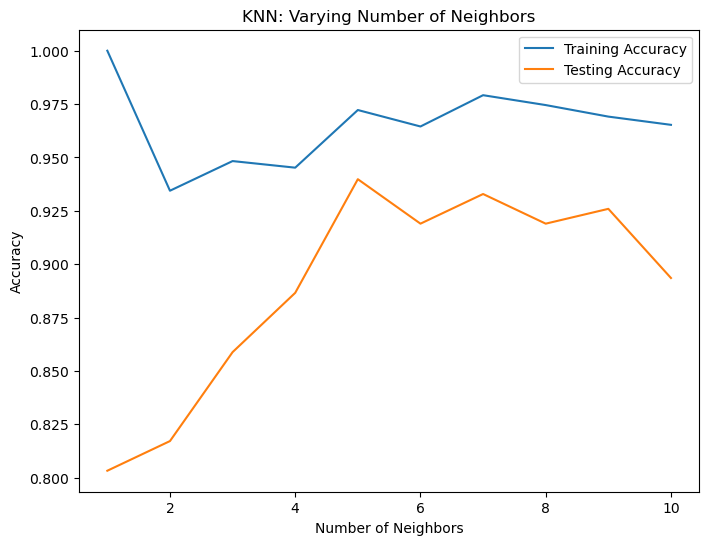

In [23]:
plt.figure(figsize=(8, 6))
plt.title("KNN: Varying Number of Neighbors")
plt.plot(neighbors, train_accuracies.values(), label="Training Accuracy")
plt.plot(neighbors, test_accuracies.values(), label="Testing Accuracy")
plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.show()
#overfitting: 1 to 4
#underfitting: from 9
#7

In [24]:
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(X_train, y_train)
print(knn.score(X_train, y_train))
print(knn.score(X_test, y_test))

0.9791666666666666
0.9328703703703703
